<a href="https://colab.research.google.com/github/SrinijaB-05/SafeStreet-1/blob/main/Bounding_boxes_main_without_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

Saving potholes57.png to potholes57.png

image 1/1 /content/potholes57.png: 480x1024 1 pothole, 1675.2ms
Speed: 5.9ms preprocess, 1675.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 1024)


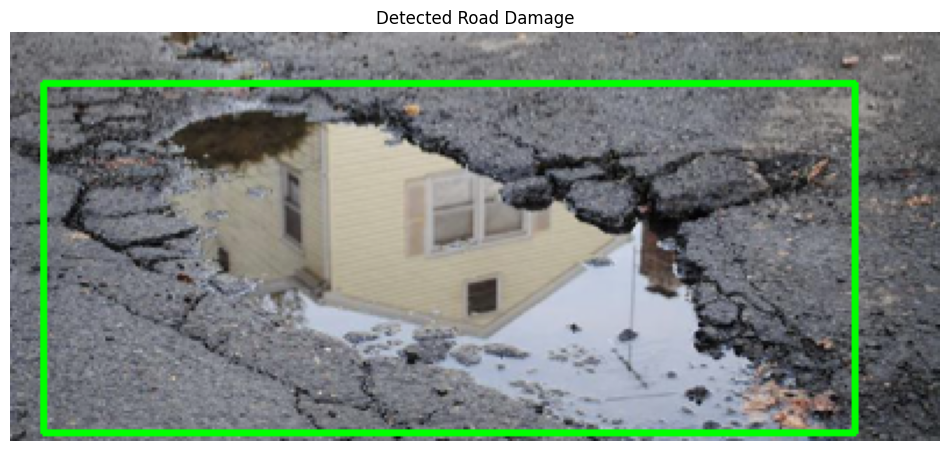

In [ ]:
from google.colab import files
uploaded = files.upload()

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load trained model
#model = YOLO("runs/detect/train/weights/best.pt")  # Adjust path if needed
model = YOLO("/content/drive/MyDrive/SafeStreetModels/best.pt")

# Use the uploaded image path (run this after you've uploaded using files.upload)
uploaded_img_path = list(uploaded.keys())[0]

# Run detection
results = model.predict(source=uploaded_img_path, conf=0.25)[0]

# Load and convert the image
img = cv2.imread(uploaded_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw only green rectangles around each detected object
for box in results.boxes:
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

# Show the result
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Detected Road Damage")
plt.show()